# Keşif

In [1]:
import sys
import os
from pathlib import Path

root_path = Path.cwd().parent.parent
if str(root_path) not in sys.path:
    sys.path.append(str(root_path))

from olist.data import Olist
data = Olist().get_data()

print(f"Tables loaded: {list(data.keys())}")

Tables loaded: ['sellers', 'product_category_name_translation', 'orders', 'order_items', 'customers', 'geolocation', 'order_payments', 'order_reviews', 'products']


In [2]:
import numpy as np
import pandas as pd
%load_ext autoreload
%autoreload 2
import os

## Veriyi Al

In [3]:
from olist.data import Olist
data = Olist().get_data()

Olist e-ticaret platformundaki her işlem şu özelliklere sahiptir:
- satın alacak olan bir `customer_id`...
- çeşitli `product_id`...
- bir `seller_id`...
- ve bir `review_id`...
- tüm bunlar bir `order_id`'ye aittir.

## Çeşitli DataFrame'lerinizin kardinalitelerini araştırın

❓ **Kaç tane benzersiz `orders`, `reviews`, `sellers`, `products` and `customers` var ?**

In [4]:
print(f"Unique Orders:    {data['orders']['order_id'].nunique()}")
print(f"Unique Reviews:   {data['order_reviews']['review_id'].nunique()}")
print(f"Unique Sellers:   {data['sellers']['seller_id'].nunique()}")
print(f"Unique Products:  {data['products']['product_id'].nunique()}")
print(f"Unique Customers: {data['customers']['customer_id'].nunique()}")

Unique Orders:    99441
Unique Reviews:   98410
Unique Sellers:   3095
Unique Products:  32951
Unique Customers: 99441


In [7]:
order_count = data['orders']['order_id'].nunique()
print(order_count)
order_count

99441


99441

❓ **Sipariş başına kaç tane yorum(reviews) var? Tüm siparişler için yorum var mı?**
<details>
    <summary markdown=‘span’>İpuçları</summary>

Bu bilgiye bireysel csv dosyanızdan doğrudan erişemezsiniz. Öğrenmek için tabloları birleştirmeniz gerekir. Hangi tür birleştirme yapmanız gerektiğini düşünün.

Hangi tablolara ihtiyacınız olduğundan emin değil misiniz? Öğrenmek için ERD'nize geri dönün.

Yorum sayısını öğrenmek için: `order_id` başına yorum sayısını sayın ve bir histogram çizin. Pandas serisinde `.hist()` kullanabilirsiniz.
</details>

In [12]:
merged_df = data['orders'].merge(data['order_reviews'], on='order_id', how='left') ## Siparişleri yorumlarla eşleştiriyorum

In [15]:
reviews_per_order = merged_df.groupby('order_id')['review_id'].count()

<Axes: >

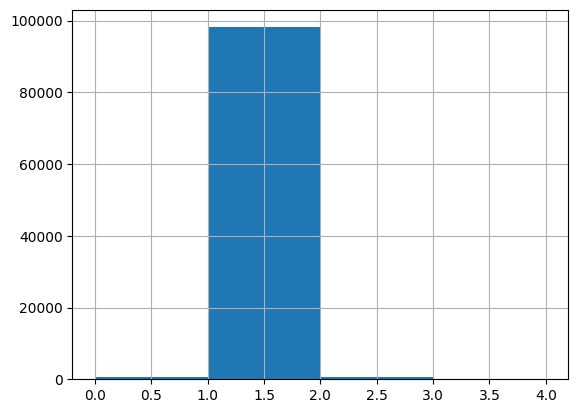

In [16]:
reviews_per_order.hist(bins=range(0, 5))

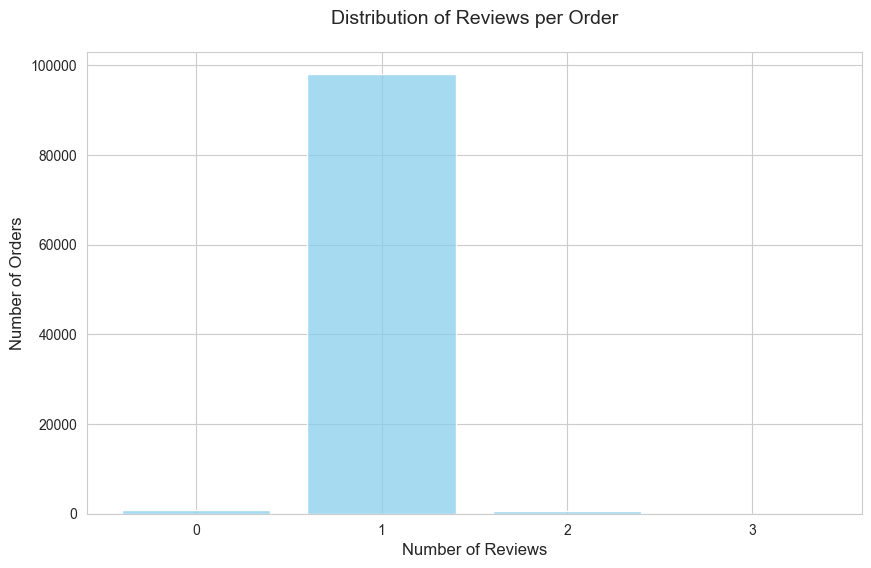

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))

sns.histplot(reviews_per_order, discrete=True, color='skyblue', shrink=0.8)

plt.title('Distribution of Reviews per Order', fontsize=14, pad=20)
plt.xlabel('Number of Reviews', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)

plt.xticks(range(int(reviews_per_order.max()) + 1))

plt.show()

🧪 **Test your code below**

Yorum eksik olan siparişlerin sayısını `int` olarak `n_missing_reviews` adlı bir değişkende saklayın.

In [17]:
missing_reviews_mask = merged_df['review_id'].isnull() #review_id sütunu boş (isnull) olanları seçiyorum

In [18]:
n_missing_reviews = missing_reviews_mask.sum()

In [19]:
from nbresult import ChallengeResult

result = ChallengeResult('exploratory',
    n=n_missing_reviews
)
result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.12.9, pytest-8.3.4, pluggy-1.5.0 -- /Users/ilos/.pyenv/versions/3.12.9/envs/workintech/bin/python
cachedir: .pytest_cache
rootdir: /Users/ilos/olist-analysis/01-Statistical-Inference/data-exploratory-analysis/tests
plugins: anyio-4.8.0, typeguard-4.4.2
collecting ... collected 1 item

test_exploratory.py::TestExploratory::test_n_missing_reviews PASSED      [100%]

============================== 1 passed in 0.08s ===============================


💯 You can commit your code:

git add tests/exploratory.pickle

git commit -m 'Completed exploratory step'

git push origin master

